# Load in data

In [1]:
import pandas as pd
import numpy as np

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
# load in data, converters turns str dtype -> list
df = pd.read_csv('../data/train_cleaned.csv', converters={'cleaned': pd.eval}, index_col='Unnamed: 0')

# join lists as single string
df['words'] = df.cleaned.apply(lambda x: " ".join(x))
df.head(2)

,cleaned,class,words
0,"[catheterization, laboratory, event, hospital,...",4,catheterization laboratory event hospital outc...
1,"[renal, abscess, child, three, renal, abscess,...",5,renal abscess child three renal abscess child ...


# fit_score function

In [33]:
def fit_score(estimator, vectorizer, dataframe=df, random_state=0):
    '''
    
    Prints the model type, vectorizer type, as well as train and test accuracy. 
    Also printsa classification report and plots a confusion matrix on the test data.
    
    Parameters:
    estimator - sklearn estimator
    vectorizer - sklearn word vectorizer
    dataframe - df containing cleaned dataset
    random_state - random state to be used
    
    Returns:
    estimator - fitted sklearn estimator
    
    '''
    
    # vectorize
    X = vectorizer.fit_transform(dataframe.words)
    # target
    y = df['class']
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # fit model
    estimator.fit(X_train, y_train)
    
    # training acc, testing acc
    train_acc, test_acc = estimator.score(X_train, y_train), estimator.score(X_test, y_test)
    
    print(f'Model: {estimator}')
    print(f'Vectorizer: {vectorizer}')
    print(f'Train accuracy: {train_acc*100:.1f}%')
    print(f'Test accuracy: {test_acc*100:.1f}%')
    
    print('\n\nClassification Report (Test Data):')
    print(classification_report(y_test, estimator.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')

# Simple models

### MultinomialNB with CountVectorizer

Model: MultinomialNB()
Vectorizer: CountVectorizer()
Train accuracy: 70.8%
Test accuracy: 59.5%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       653
           2       0.53      0.70      0.60       294
           3       0.47      0.58      0.52       393
           4       0.65      0.76      0.70       585
           5       0.55      0.33      0.41       963

    accuracy                           0.59      2888
   macro avg       0.58      0.63      0.60      2888
weighted avg       0.59      0.59      0.58      2888



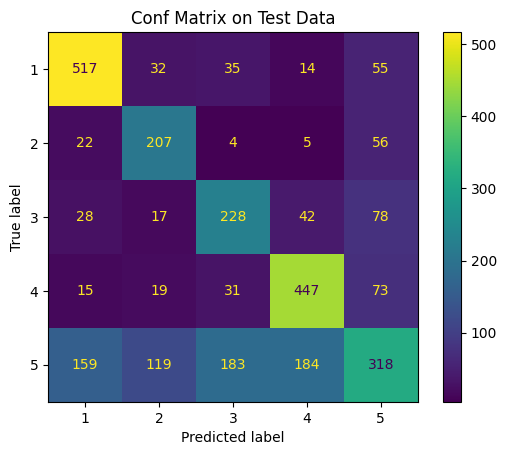

In [34]:
fit_score(MultinomialNB(), CountVectorizer())

### DecisionTree with CountVectorizer

Model: DecisionTreeClassifier()
Vectorizer: CountVectorizer()
Train accuracy: 82.1%
Test accuracy: 43.4%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.59      0.60      0.60       653
           2       0.34      0.38      0.36       294
           3       0.32      0.33      0.33       393
           4       0.52      0.54      0.53       585
           5       0.34      0.31      0.33       963

    accuracy                           0.43      2888
   macro avg       0.42      0.43      0.43      2888
weighted avg       0.43      0.43      0.43      2888



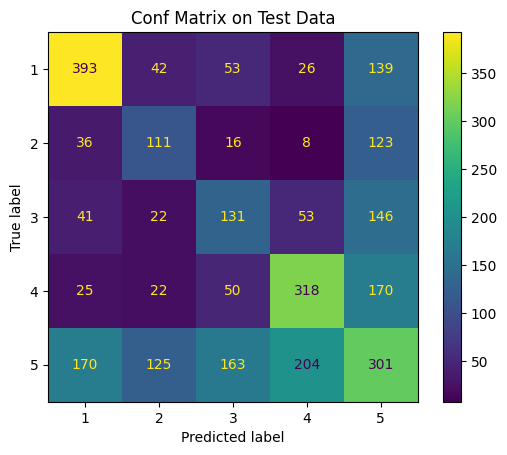

In [35]:
fit_score(DecisionTreeClassifier(), CountVectorizer())

### MultinomialNB with TfidfVectorizer

Model: MultinomialNB()
Vectorizer: TfidfVectorizer()
Train accuracy: 59.2%
Test accuracy: 52.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.73      0.64      0.68       653
           2       1.00      0.00      0.01       294
           3       0.41      0.02      0.03       393
           4       0.70      0.58      0.64       585
           5       0.41      0.77      0.53       963

    accuracy                           0.52      2888
   macro avg       0.65      0.40      0.38      2888
weighted avg       0.60      0.52      0.47      2888



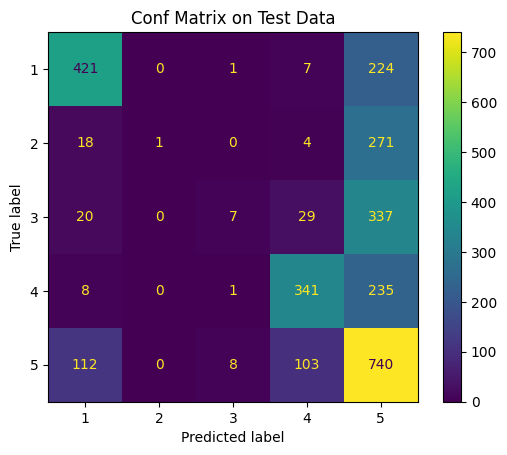

In [36]:
fit_score(MultinomialNB(), TfidfVectorizer())

### DecisionTree with TfidfVectorizer

Model: DecisionTreeClassifier()
Vectorizer: TfidfVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.1%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.57      0.60      0.59       653
           2       0.35      0.35      0.35       294
           3       0.30      0.30      0.30       393
           4       0.51      0.54      0.52       585
           5       0.32      0.29      0.31       963

    accuracy                           0.42      2888
   macro avg       0.41      0.42      0.41      2888
weighted avg       0.42      0.42      0.42      2888



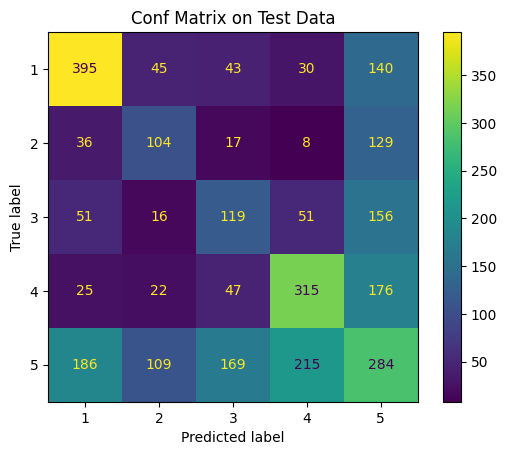

In [37]:
fit_score(DecisionTreeClassifier(), TfidfVectorizer())

### DecisionTree with HashingVectorizer

Model: DecisionTreeClassifier()
Vectorizer: HashingVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.9%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.57      0.61      0.59       653
           2       0.36      0.38      0.37       294
           3       0.32      0.32      0.32       393
           4       0.50      0.52      0.51       585
           5       0.34      0.31      0.32       963

    accuracy                           0.43      2888
   macro avg       0.42      0.43      0.42      2888
weighted avg       0.42      0.43      0.43      2888



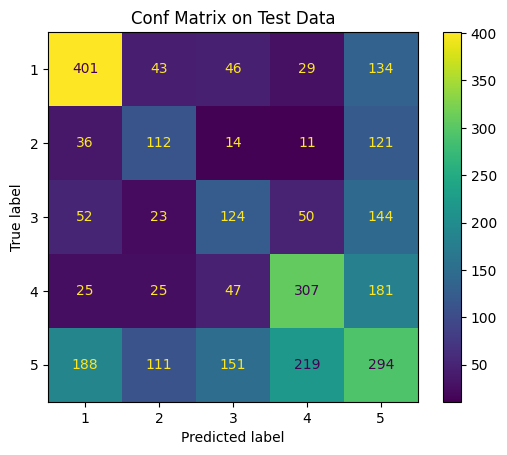

In [39]:
fit_score(DecisionTreeClassifier(), HashingVectorizer())

- Best simple model was __MultinomialNB, CountVectorizer__ with a 59.5% test acc